In [153]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import Isomap
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import LocallyLinearEmbedding

'''Ignore deprecation and future, and user warnings'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)

#import file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#display(train_data.head(5))

labels = train_data['label']
train = train_data.drop('label', 1)

Printing 16 digits to understand the data we're looking at.

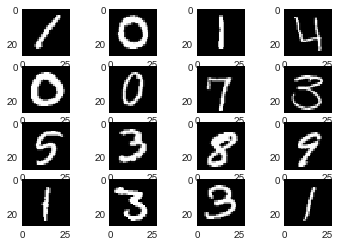

In [150]:
for digits in range(0,16):
    pixels = train[digits:digits+1]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28,28))
    plt.subplot(4,4,digits+1)
    plt.imshow(pixels, cmap='gray')

Split the data into train/test groups

In [151]:
X_train, X_test, y_train, y_test = train_test_split(train.values,
                                                          labels.values,
                                                          test_size=0.2,
                                                          random_state=42)

Optional section: Run this to reduce the run time of the nearest neighbour test below, note it will give different answers.
I have chosen to use this and it is reflected in all further tests.
Go to ** to skip this section of analysis.

In [ ]:
#principle component analysis
start_time = time.time()
pca = PCA(n_components=50)
pca.fit(train)
transform_train1 = pca.transform(X_train)
transform_test1 = pca.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train1)
dim_reduce_test.append(transform_test1)
print('1 complete in ', elapsed_time, ' seconds')

Find the optimal nearest neighbour k value for use in further tests.
Without PCA result is NN = 1, with PCA NN = 3 gives the highest accuracy.

KNN Accuracy: 0.9686904761904762
KNN Accuracy: 0.9621428571428572
KNN Accuracy: 0.9666666666666667
KNN Accuracy: 0.9644047619047619
KNN Accuracy: 0.9648809523809524
KNN Accuracy: 0.9636904761904762
KNN Accuracy: 0.9632142857142857
KNN Accuracy: 0.9627380952380953
KNN Accuracy: 0.9613095238095238
[0.9686904761904762, 0.9621428571428572, 0.9666666666666667, 0.9644047619047619, 0.9648809523809524, 0.9636904761904762, 0.9632142857142857, 0.9627380952380953, 0.9613095238095238]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


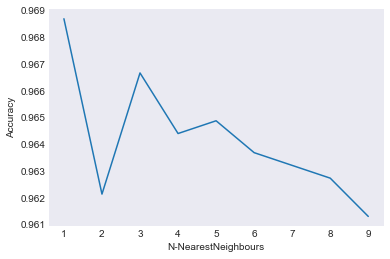

In [129]:
scores = []
NN = [1,2,3,4,5,6,7,8,9]
for i in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    prediction=clf.predict(X_test)
    scores.append(accuracy_score(y_test, prediction))
    print("KNN Accuracy:",accuracy_score(y_test, prediction))
 
print(scores)
print(NN)
plt.plot(NN, scores)
plt.xlabel('N-NearestNeighbours')
plt.ylabel('Accuracy')
plt.show()

Try various dimensionality reduction techniques and produce the time it takes to make these transformations.
Given the time taken and accuracy achieved in further tests you can deduce which is the best all round fit for your needs.

In [152]:
dim_reduce_train = []
dim_reduce_test = []

#principle component analysis
start_time = time.time()
pca = PCA(n_components=50)
pca.fit(train)
transform_train1 = pca.transform(X_train)
transform_test1 = pca.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train1)
dim_reduce_test.append(transform_test1)
print('1 complete in ', elapsed_time, ' seconds')

#Incremental PCA
start_time = time.time()
n_batches = 256
inc_pca = IncrementalPCA(n_components=132)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)
transform_train2 = inc_pca.transform(X_train)
transform_test2 = inc_pca.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train2)
dim_reduce_test.append(transform_test2)
print('2 complete in ', elapsed_time, ' seconds')

#Kernel PCA
start_time = time.time()
kpca = KernelPCA(kernel="rbf",n_components=132, gamma=None, fit_inverse_transform=True, random_state = 2019, n_jobs=1)
kpca.fit(X_train[:10000,:])
transform_train3 = kpca.transform(X_train)
transform_test3 = kpca.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train3)
dim_reduce_test.append(transform_test3)
print('3 complete in ', elapsed_time, ' seconds')

#Sparse PCA
start_time = time.time()
sparsepca = SparsePCA(n_components=132, alpha=0.0001, random_state=2019, n_jobs=-1)
sparsepca.fit(X_train[:10000,:])
transform_train4 = sparsepca.transform(X_train)
transform_test4 = sparsepca.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train4)
dim_reduce_test.append(transform_test4)
print('4 complete in ', elapsed_time, ' seconds')

#Singular Value Decomposition [SVD]
start_time = time.time()
SVD_ = TruncatedSVD(n_components=132,algorithm='randomized', random_state=2019, n_iter=5)
SVD_.fit(X_train[:10000,:])
transform_train5 = SVD_.transform(X_train)
transform_test5 = SVD_.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train5)
dim_reduce_test.append(transform_test5)
print('5 complete in ', elapsed_time, ' seconds')

#Gaussian Random Projection [GRP]
start_time = time.time()
GRP = GaussianRandomProjection(n_components=132,eps = 0.5, random_state=2019)
GRP.fit(X_train[:10000,:])
transform_train6 = GRP.transform(X_train)
transform_test6 = GRP.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train6)
dim_reduce_test.append(transform_test6)
print('6 complete in ', elapsed_time, ' seconds')

#Sparse Random Projection [SRP]
start_time = time.time()
SRP = SparseRandomProjection(n_components=132,density = 'auto', eps = 0.5, random_state=2019, dense_output = False)
SRP.fit(X_train[:10000,:])
transform_train7 = SRP.transform(X_train)
transform_test7 = SRP.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train7)
dim_reduce_test.append(transform_test7)
print('7 complete in ', elapsed_time, ' seconds')

#ISOMAP
start_time = time.time()
isomap = Isomap(n_components=132, n_jobs = 4, n_neighbors = 5)
isomap.fit(X_train[0:5000,:])
transform_train8 = isomap.transform(X_train)
transform_test8 = isomap.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train8)
dim_reduce_test.append(transform_test8)
print('8 complete in ', elapsed_time, ' seconds')

#Independent Composent Analysis [ICA]
start_time = time.time()
FastICA = FastICA(n_components=132, algorithm = 'parallel',whiten = True,max_iter = 100,  random_state=2019)
transform_train9 = FastICA.fit_transform(X_train)
transform_test9 = FastICA.fit_transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train9)
dim_reduce_test.append(transform_test9)
print('9 complete in ', elapsed_time, ' seconds')

#Locally Linear Embedding [LLE]
start_time = time.time()
lle = LocallyLinearEmbedding(n_components=4, n_neighbors = 10,method = 'modified', n_jobs = 4,  random_state=2019)
lle.fit(X_train[:5000,:])
transform_train10 = lle.transform(X_train)
transform_test10 = lle.transform(X_test)
elapsed_time = time.time() - start_time
dim_reduce_train.append(transform_train10)
dim_reduce_test.append(transform_test10)
print('10 complete in ', elapsed_time, ' seconds')

1 complete in  3.298513650894165  seconds


C:\Users\matth\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:271: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\matth\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2 complete in  9.846253395080566  seconds
3 complete in  263.26020216941833  seconds
4 complete in  38.30873417854309  seconds
5 complete in  1.7194883823394775  seconds
6 complete in  0.3367924690246582  seconds
7 complete in  0.7535417079925537  seconds
8 complete in  145.77808046340942  seconds
9 complete in  20.62407946586609  seconds
10 complete in  126.83704137802124  seconds


Test each dimensionality reduction technique and plot accuracy.

KNN Accuracy: 0.9735714285714285
KNN Accuracy: 0.9714285714285714
KNN Accuracy: 0.09714285714285714
KNN Accuracy: 0.9453571428571429
KNN Accuracy: 0.9710714285714286
KNN Accuracy: 0.9588095238095238
KNN Accuracy: 0.9582142857142857
KNN Accuracy: 0.9247619047619048
KNN Accuracy: 0.14761904761904762
KNN Accuracy: 0.8283333333333334
[0.9735714285714285, 0.9714285714285714, 0.09714285714285714, 0.9453571428571429, 0.9710714285714286, 0.9588095238095238, 0.9582142857142857, 0.9247619047619048, 0.14761904761904762, 0.8283333333333334]


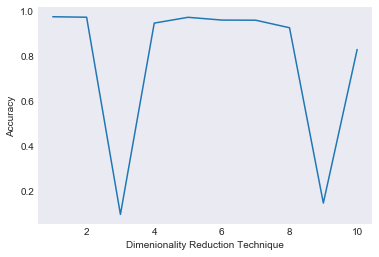

In [131]:
scores = []
for i in range(0, 10):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(dim_reduce_train[i], y_train)
    prediction=clf.predict(dim_reduce_test[i])
    scores.append(accuracy_score(y_test, prediction))
    print("KNN Accuracy:",accuracy_score(y_test, prediction))
 
print(scores)
plt.plot(NN, scores)
plt.xlabel('Dimenionality Reduction Technique')
plt.ylabel('Accuracy')
plt.show()

** PCA produces the best result and can be transformed quickly so this will be used from now on. 
Run below to skip NN and dimensionality reduction testing.

In [133]:
#principle component analysis
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(X_train)
transform_test = pca.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(transform_train, y_train)
prediction=clf.predict(transform_test)
scores.append(accuracy_score(y_test, prediction))
print("KNN Accuracy:",accuracy_score(y_test, prediction))


KNN Accuracy: 0.974047619047619


Testing a random forest classifier.

In [154]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(transform_train, y_train)
prediction=clf.predict(transform_test)
scores.append(accuracy_score(y_test, prediction))
print("RF Accuracy:",accuracy_score(y_test, prediction))

RF Accuracy: 0.9465476190476191


Confusion matrix depicting classification count for each image.

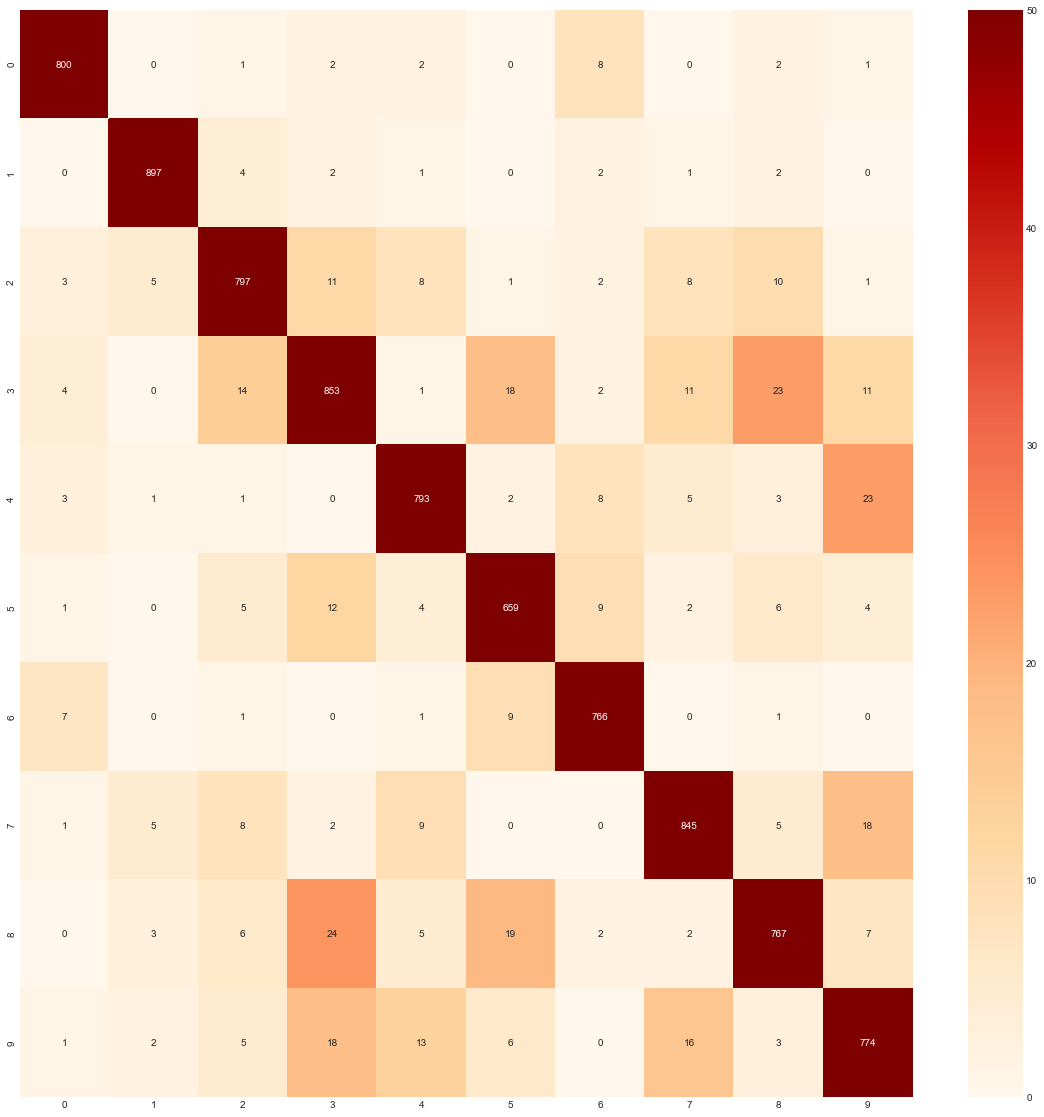

In [155]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True, vmin = 0, vmax = 50, fmt = "d", cmap="OrRd", yticklabels=True)